In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dlinputs import gopen, utils

In [3]:
import numpy as np
from scipy import ndimage as ndi
figsize(16, 16)
rc("image", cmap="gray")

In [4]:
data = gopen.open_source("/home/zhaoke/justrypython/ocrorot/uw3-framed-lines.tgz")
sample = data.next()
utils.print_sample(sample)

__key__ 'A001BIN'
__source__ '/home/zhaoke/justrypython/ocrorot/uw3-framed-lines.tgz'
framed.png float32 (3300, 2592)
lines.png float32 (3300, 2592)


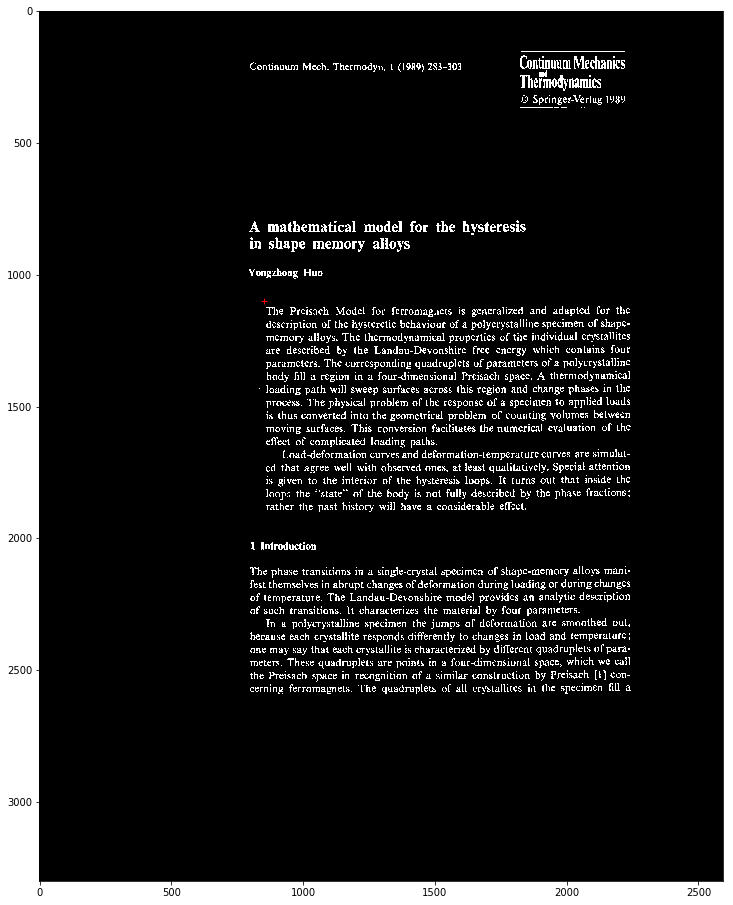

In [5]:
page = sample["framed.png"]
plot([850], [1100], 'r+')
imshow(page)

0.0657968


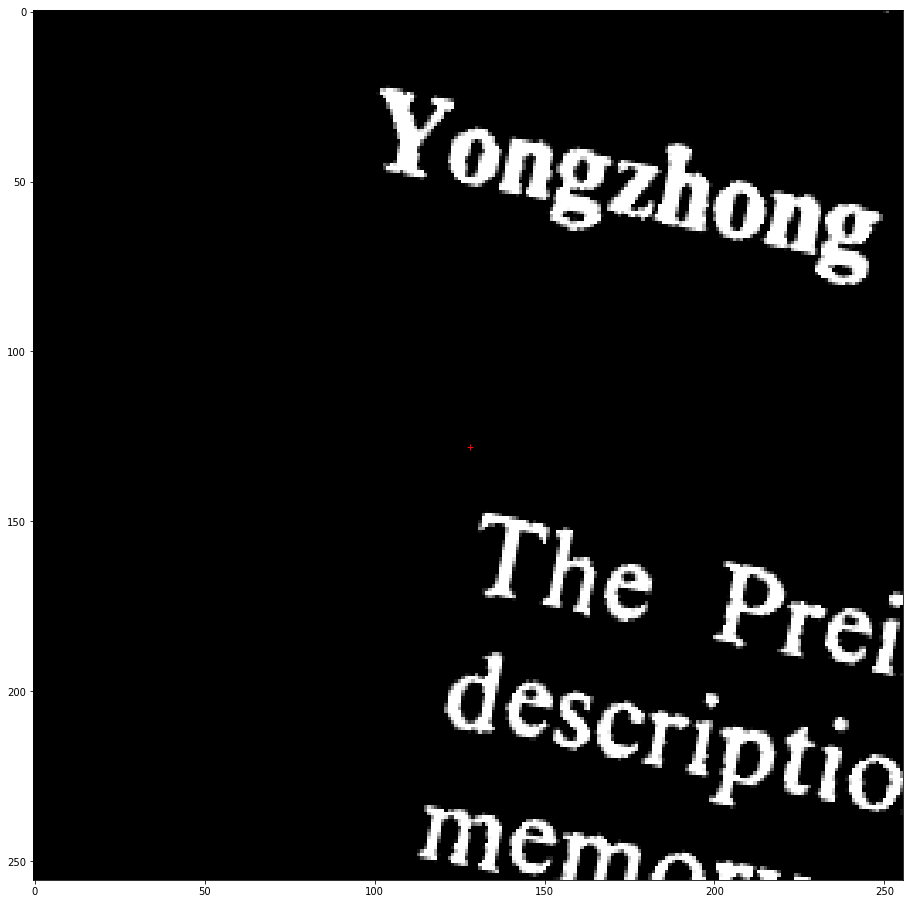

In [6]:
def get_patch(image, center, scale=1.0, alpha=0.0, shape=(256, 256)):
    yx = array(center, 'f')
    hw = array(shape, 'f')
    m = array([[cos(alpha), -sin(alpha)], [sin(alpha), cos(alpha)]], 'f')/scale
    offset = yx - dot(m, hw/2.0)
    return ndi.affine_transform(image, m, offset=offset, output_shape=shape, order=1)
patch = get_patch(page, (1100, 850), alpha=0.2, scale=0.8)
plot([128], [128], 'r+')
imshow(patch)
print mean(patch)

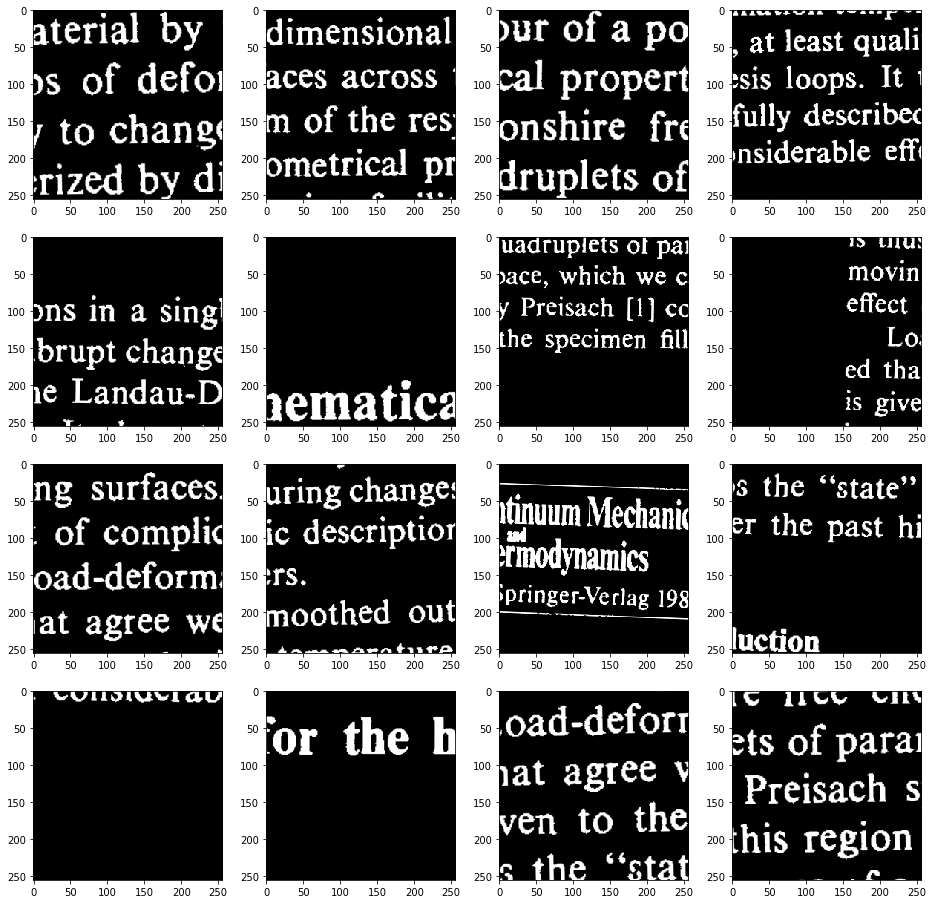

In [7]:
def get_patches(image, npatches=64, shape=(256, 256), ntrials=1024, minmean=0.02,):
    patches = []
    h, w = image.shape
    for i in range(ntrials):
        if len(patches) >= npatches: break
        y, x = randint(0, h-1), randint(0, w-1)
        alpha = random.uniform(-2.0*pi/180, 2.0*pi/180)
        scale = random.uniform(0.7, 1.4)
        patch = get_patch(image, (y, x), alpha=alpha, scale=scale, shape=shape)
        if mean(patch) < minmean: continue
        patches.append((patch, dict(offset=(y, x), alpha=alpha, scale=scale)))
    return patches

patches = get_patches(page)
for i, (patch, params) in enumerate(patches[:16]):
    subplot(4, 4, i+1)
    imshow(patch)